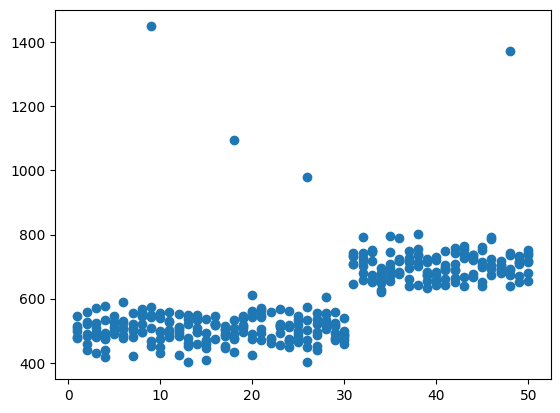

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

path = r"/Users/dungnguyen/Desktop/WORKSPACE/DS/StrataScratch/Sales_Data_Analysis/datasets" # use your path
ext = r"*.csv"
all_files = glob.glob(os.path.join(path , ext))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

frame["sale_date"] =  pd.to_datetime(frame["sale_time"]).dt.date 
frame["fiscal_sale_date"] =  pd.to_datetime(frame["sale_time"]).dt.date + pd.DateOffset(months=3)
frame["sale_time"] =  pd.to_datetime(frame["sale_time"]).dt.time
frame["fiscal_week"] = pd.to_datetime(frame['fiscal_sale_date']).dt.isocalendar().week
frame["fiscal_month"] = pd.to_datetime(frame['fiscal_sale_date']  ).dt.month 
frame["date"] = pd.to_datetime(frame['fiscal_sale_date']  ).dt.day
# frame["year"] = pd.to_datetime(frame['sale_date']).dt.year


frame.loc[ frame["purchaser_gender"]  == "male" , "gender_code"] = 1 
frame.loc[ frame["purchaser_gender"]  == "female" , "gender_code"] = 0


#Plot daily sales for all 50 weeks.
frame_by_fweek = frame[["fiscal_sale_date","fiscal_week","fiscal_month"]]
frame_by_fweek = frame_by_fweek.groupby( by= ["fiscal_sale_date","fiscal_month","fiscal_week"] ).size().reset_index(name= 'sale_count_by_week')

plt.scatter( frame_by_fweek["fiscal_week"] , frame_by_fweek["sale_count_by_week"]  )
##### the plot show from around week 30 - 35 have sale boom
##### let's investigate more about what date the sale is starting




the plot show from around week 30 - 35 have sale boom
let's investigate more about what date the sale is starting

In [3]:
frame_by_fdate = frame[["fiscal_sale_date","fiscal_week"]]
frame_by_fdate["fiscal_week"].astype(int)
frame_by_fdate = frame_by_fdate[ (frame_by_fdate["fiscal_week"] <= 35) & (frame_by_fdate["fiscal_week"] >= 30) ]
frame_by_fdate = frame_by_fdate.groupby( by= ["fiscal_sale_date", "fiscal_week" ] ).size().reset_index(name= 'sale_by_date')
print(frame_by_fdate)
### the daily sale is sudden change at July 29

   fiscal_sale_date  fiscal_week  sale_by_date
0        2013-07-22           30           540
1        2013-07-23           30           472
2        2013-07-24           30           487
3        2013-07-25           30           498
4        2013-07-26           30           480
5        2013-07-27           30           489
6        2013-07-28           30           458
7        2013-07-29           31           732
8        2013-07-30           31           732
9        2013-08-01           31           709
10       2013-08-02           31           744
11       2013-08-03           31           647
12       2013-08-04           31           707
13       2013-08-05           32           728
14       2013-08-06           32           791
15       2013-08-07           32           743
16       2013-08-08           32           679
17       2013-08-09           32           659
18       2013-08-10           32           703
19       2013-08-11           32           719
20       2013

the daily sale is sudden change at July 29

In [7]:
from scipy import stats
rvs = frame_by_fdate["sale_by_date"]
stats.ttest_1samp(rvs, popmean= 732 )
### p-value of 732 is 2.135e-5, which is < 0.05. p-value of 732 is fall below significant level then it means statistically significant. 


TtestResult(statistic=-4.814370943763726, pvalue=2.1351674983582952e-05, df=40)

p-value of 732 is 2.135e-5, which is < 0.05. p-value of 732 is fall below significant level then it means statistically significant. 